# Homework 5 - Titanic Dataset Analysis

### Submitted by: Piyush Agrawal

This notebook analyzes the Titanic dataset and answers the provided questions.

## 1. What is the size of the dataset? Show a few rows of the dataset.

In [1]:
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Size of the dataset
print('Dataset Size:', titanic_df.shape)

# Show first 5 rows
print(titanic_df.head())

Dataset Size: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

## 2. How many NA values do we have in each column of the dataset?

In [2]:
print('Missing Values per Column:\n')
print(titanic_df.isnull().sum())

Missing Values per Column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 3. Visualize the number of NA values in each column using the missingno module.

<Axes: >

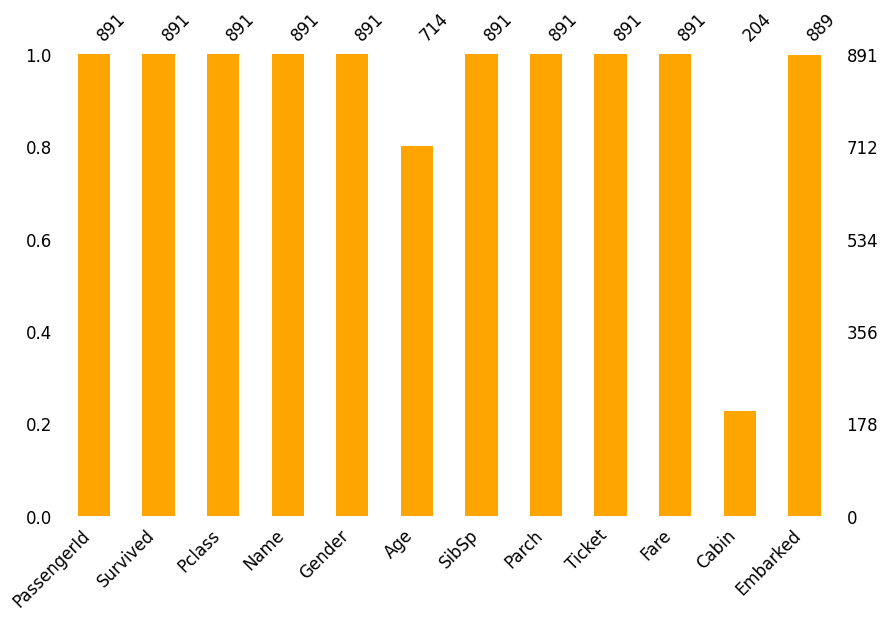

In [4]:
import missingno as msno
import pandas as pd


# Visualize missing values using missingno
msno.bar(titanic_df, color='orange', figsize=(10, 6), fontsize=12)

## 4. Drop the `Cabin` column.

In [5]:
titanic_df = titanic_df.drop(columns=['Cabin'])
print('Dropped Cabin column.')

Dropped Cabin column.


## 5. What are the median and mean of the `Survived`, `SibSp`, `Parch`, and `Fare` columns?

In [6]:
print('Median Values:\n', titanic_df[['Survived', 'SibSp', 'Parch', 'Fare']].median())
print('\nMean Values:\n', titanic_df[['Survived', 'SibSp', 'Parch', 'Fare']].mean())

Median Values:
 Survived     0.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

Mean Values:
 Survived     0.383838
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64


## 6. How many unique values of `Pclass` do we have? Which one has the highest number of observations?

In [7]:
print('Unique Pclass values:', titanic_df['Pclass'].nunique())
print('\nPclass Value Counts:\n', titanic_df['Pclass'].value_counts())

Unique Pclass values: 3

Pclass Value Counts:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


## 7. Compare the survival rate for males vs females using groupby and mean.

In [8]:
print('Overall Survival Rate:', titanic_df['Survived'].mean())
print('\nSurvival Rate by Gender:\n')
print(titanic_df.groupby('Gender')['Survived'].mean())

Overall Survival Rate: 0.3838383838383838

Survival Rate by Gender:

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Yes we can conclude that they were able to save women first from the survival rates above. 
### Analysis:
- The overall survival rate is **38.38%**.
- The survival rate for **females** is **74.2%**, significantly higher than that for **males** at **18.9%**.

## 8. Which `Pclass` has the highest survival rate?

In [9]:
pclass_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print('Survival Rate by Pclass:\n', pclass_survival)
print('\nPclass with Highest Survival Rate:', pclass_survival.idxmax())

Survival Rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclass with Highest Survival Rate: 1


## 9. Create a column `AdultOrChild` based on age (<18 is child). Fill NA with 'unknown' and find survival rates.

In [10]:
def classify_age(age):
    if pd.isna(age):
        return 'unknown'
    return 'Child' if age < 18 else 'Adult'

titanic_df['AdultOrChild'] = titanic_df['Age'].apply(classify_age)
age_survival = titanic_df.groupby('AdultOrChild')['Survived'].mean()
print('Survival Rate by Age Group:\n', age_survival)

Survival Rate by Age Group:
 AdultOrChild
Adult      0.381032
Child      0.539823
unknown    0.293785
Name: Survived, dtype: float64


Yes we can conclude that they were able to save children first. 

### Analysis:
- The survival rate for **Children** (53.98%) is significantly higher than that for **Adults** (38.1%).
- This suggests that **children were prioritized for survival**.
- Passengers with **unknown ages** had a lower survival rate (29.4%).

## 10. Compare survival rates for unique combinations of `Gender`, `Pclass`, and `AdultOrChild`.

In [11]:
grouped_survival = titanic_df.groupby(['Gender', 'Pclass', 'AdultOrChild'])['Survived'].mean()
print('Survival Rate by Gender, Pclass, and AdultOrChild:\n')
print(grouped_survival)

Survival Rate by Gender, Pclass, and AdultOrChild:

Gender  Pclass  AdultOrChild
female  1       Adult           0.974026
                Child           0.875000
                unknown         1.000000
        2       Adult           0.903226
                Child           1.000000
                unknown         1.000000
        3       Adult           0.417910
                Child           0.542857
                unknown         0.595238
male    1       Adult           0.371134
                Child           1.000000
                unknown         0.238095
        2       Adult           0.068182
                Child           0.818182
                unknown         0.222222
        3       Adult           0.133333
                Child           0.232558
                unknown         0.095745
Name: Survived, dtype: float64


## Final Conclusion: Survival Rate Patterns

From the survival rate breakdown by `Gender`, `Pclass`, and `AdultOrChild`, we can observe the following patterns:

1. **Females** had significantly higher survival rates than males across all classes:
   - In **Class 1** and **Class 2**, nearly all female adults and children survived.
   - Even in **Class 3**, where the survival rate is lower overall, female children and adults had better chances of survival compared to males.

2. **Children** generally had better survival rates compared to adults, regardless of `Pclass` or `Gender`:
   - For both males and females, children in **Class 2** had 100% survival.
   - **Male children** in Class 1 and Class 2 had notably higher survival rates compared to male adults.

3. **Pclass Influence**:
   - Survival rates were highest in **Class 1**, followed by **Class 2**, and lowest in **Class 3**.
   - This trend was consistent for both males and females.

4. **Males** had a significantly lower survival rate overall:
   - Male adults in **Class 3** had the lowest survival rate at **13.3%**.
   - Male children, however, still fared better, especially in higher classes.
